# Tennis Ace Linear Regression analysis

The scope of the project is to perform a Liner Regression analysis on tennis statistics to understand what is the best way to predict wins.

Provided in `tennis_stats.csv` is data from the men’s professional tennis league, which is called the [TP (Association of Tennis Professionals)](https://www.atptour.com/en/). Data from the top 1500 ranked players in the ATP over the span of `2009` to `2017` are provided in the file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

### Project Structure

The project is divided in the following sections:
- **Import Python modules**: import modules that will be necessary for the project
- **Loading the Data**: load data into dataframes and have a glance at the data
- **Cleaning the Data**: check for null values, duplicates, data types and change specific names if necessary
- **Exploratory Data Analysis**: check for relationship between features and specific outcomes
- **Linear Regression with one feature**: find single best feature to predict speficic outcome
- **Linear Regression with multiple feature:** find multiple best features to predict specific outcome
- **Conclusions**: summarize findings

# Import Python modules

Import primary modules that will be used in the project:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


plt.style.use('seaborn-v0_8')

# Loading the Data

There is one dataset used in this project:

In [3]:
df = pd.read_csv('tennis_stats.csv')

print(df.shape)
df.head()

(1721, 24)


,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


The dataset contains the following columns:

**Identifying Data**
- `Player`: name of the tennis player
- `Year`: year data was recorded

**Service Game Columns (Offensive)**
- `Aces`: number of serves by the player where the receiver does not touch the ball
- `DoubleFaults`: number of times player missed both first and second serve attempts
- `FirstServe`: % of first-serve attempts made
- `FirstServePointsWon`: % of first-serve attempt points won by the player
- `SecondServePointsWon`: % of second-serve attempt points won by the player
- `BreakPointsFaced`: number of times where the receiver could have won service game of the player
- `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance
- `ServiceGamesPlayed`: total number of games where the player served
- `ServiceGamesWon`: total number of games where the player served and won
- `TotalServicePointsWon`: % of points in games where the player served that they won

**Return Game Columns (Defensive)**
- `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win
- `SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win
- `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
- `BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance
- `ReturnGamesPlayed`: total number of games where the player’s opponent served
- `ReturnGamesWon`: total number of games where the player’s opponent served and the player won
- `ReturnPointsWon`: total number of points where the player’s opponent served and the player won
- `TotalPointsWon`: % of points won by the player

**Outcomes**
- `Wins`: number of matches won in a year
- `Losses`: number of matches lost in a year
- `Winnings`: total winnings in USD($) in a year
- `Ranking`: ranking at the end of year
    

In [4]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

# Cleaning the data

The data has been pre-cleaned so no need to go into too much details.
The following tasks will be performed:

- Check if columns are assigned to correct data types
- Check for outliers
- Check for null values

In [5]:
# Check if data types assigned are correct
df.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

In [6]:
# Check if you see anything curious in the data and outliers
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


In [7]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

It looks like the data is assigned to the correct type, there not seem to be null values, outliers or weird things going on.

# Exploratory Data Analysis

I chose to predict the feature `Wins`, which is the numbers of match won in a year. `Wins` was plotted against all 'Offensive' and 'Defensive' features to see which ones have a linear relathionship with the outcome.

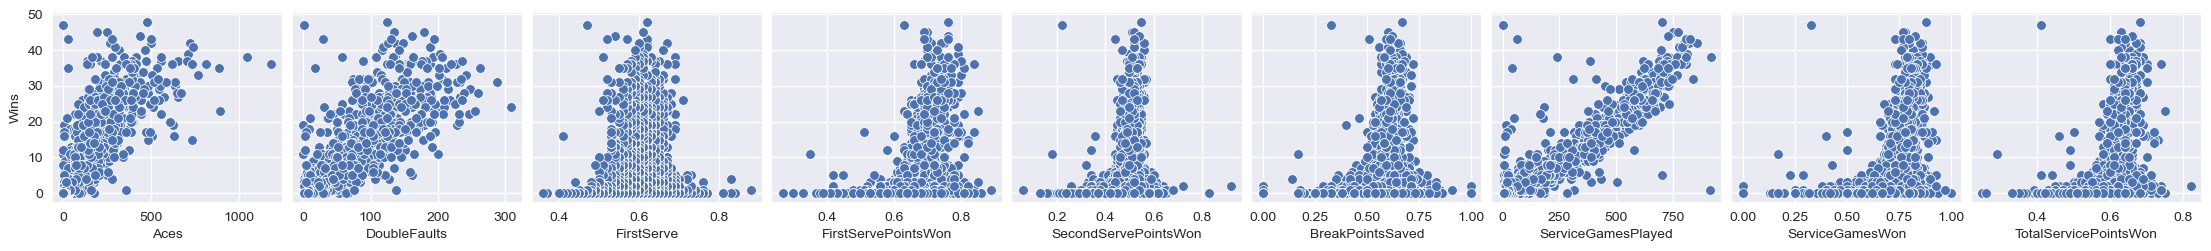

In [8]:
#'Offensive' features vs Matched won

sns.pairplot(data=df, 
            y_vars=['Wins'],
            x_vars=['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon',
                   'BreakPointsSaved', 'ServiceGamesPlayed','ServiceGamesWon', 'TotalServicePointsWon'])

plt.show()

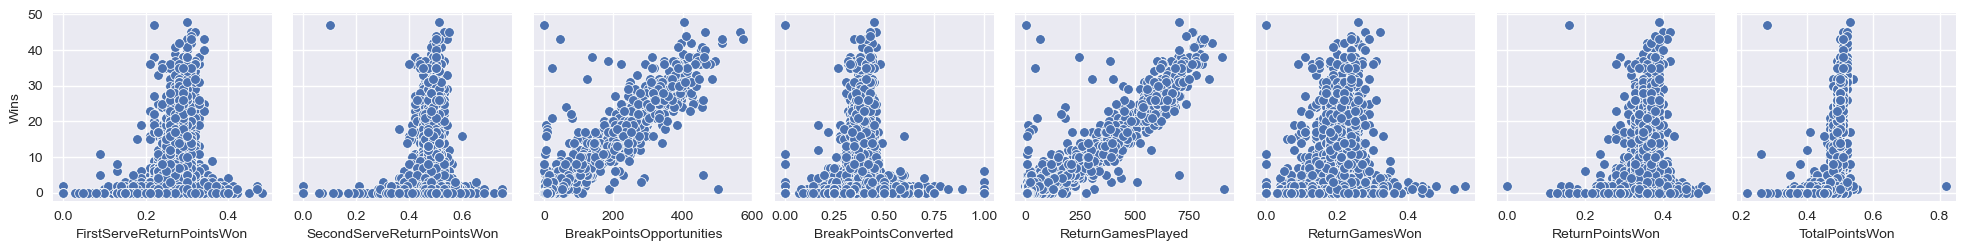

In [9]:
#'Defensive' features vs Matched won
sns.pairplot(data=df, 
            y_vars=['Wins'],
            x_vars=['FirstServeReturnPointsWon','SecondServeReturnPointsWon','BreakPointsOpportunities', 
                   'BreakPointsConverted','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','TotalPointsWon'])
plt.show()

It seems that the best features to predict `Wins` are:
- `Aces`
- `DoubleFaults`
- `ServiceGamesPlayed`
- `BreakPointsOpportunities`
- `ReturnGamesPlayed`

# Single feature linear regression

I will try to predict `Wins` using `Aces` by building a `LinearRegression` model, and calculating the mean squared error to evaluate the results.

In [21]:
# Select columns that will be used in the model
x = df['Aces']
x = np.array(x)
x = x.reshape(-1, 1)
y = df['Wins']

# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [22]:
# Fit data in the model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [23]:
# Generate predicted wins (y_predict) using the model above
y_predict = lm.predict(x_test)

# Calculate loss score
loss = mean_squared_error(y_test, y_predict)

print('Test score:')
print(loss)

Test score:
40.343248549576764


The score looks fairly small. Let's see how the `y_predict` compares to the original data `y_test`.

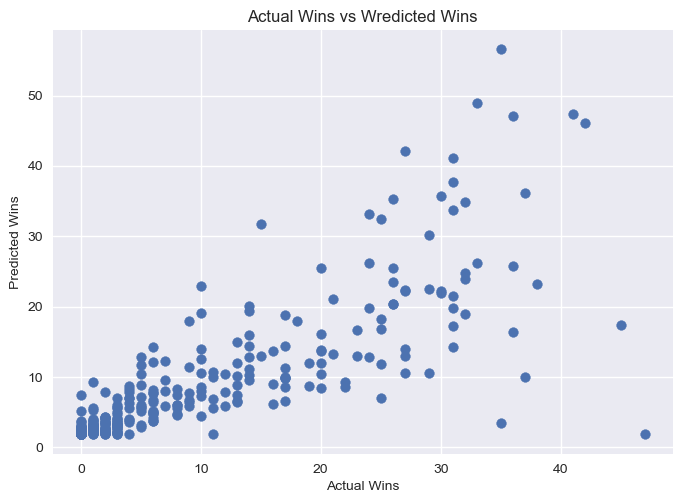

In [24]:
plt.scatter(y_test, y_predict)
plt.title('Actual Wins vs Wredicted Wins')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()

The relationship between actual and ppredicted wins is ok but could be better.

Let's define a function that tests all features to predict a feature and orders them by the mean squared error.

In [14]:
def scoring(df, list_features, y):
    y = df[y]
    x_name = []
    loss_list = []
    for i in range(len(list_features)):
        x = df[list_features[i]]
        x = np.array(x)
        x = x.reshape(-1, 1)
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
        
        lm = LinearRegression()
        lm.fit(x_train, y_train)
        
        y_predict = lm.predict(x_test)
        loss = mean_squared_error(y_test, y_predict)
        
        x_name.append(list_features[i])
        loss_list.append(loss)
    
    results = pd.DataFrame(loss_list, x_name, columns=['LossScore']).sort_values(by='LossScore')
    
    return results

In [15]:
# Test the function by using all offensive and devensive features and 'Wins' as outcome that we want to predict
list_features = ['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon',
                'BreakPointsSaved', 'ServiceGamesPlayed','ServiceGamesWon', 'TotalServicePointsWon', 
                'FirstServeReturnPointsWon','SecondServeReturnPointsWon','BreakPointsOpportunities', 
                'BreakPointsConverted','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','TotalPointsWon']

loss = scoring(df, list_features, 'Wins')
loss

,LossScore
ServiceGamesPlayed,18.147960
ReturnGamesPlayed,18.340872
BreakPointsOpportunities,20.567931
DoubleFaults,37.751101
Aces,40.343249
TotalServicePointsWon,102.601113
FirstServePointsWon,102.639151
ServiceGamesWon,103.896014
TotalPointsWon,105.129197
BreakPointsSaved,112.516519


It looks like the feature with the loswet score is `ServiceGamesPlayed`. Let's predict `Wins` using this feature and plot the relationship.

In [27]:
# Fit the model again using ServiceGamesPlayed as predictor
x = df['ServiceGamesPlayed']
x = np.array(x)
x = x.reshape(-1, 1)
y = df['Wins']

lm = LinearRegression()
lm.fit(x, y)
        
y_predict = lm.predict(x)
loss = mean_squared_error(y, y_predict)

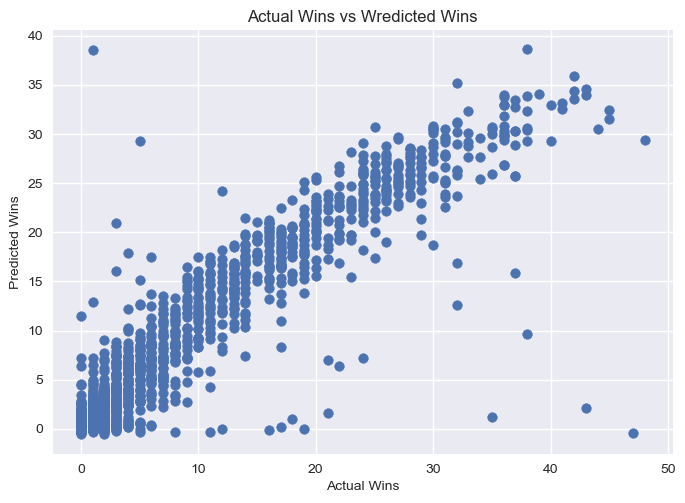

In [28]:
plt.scatter(y, y_predict)
plt.title('Actual Wins vs Predicted Wins')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()

`ServiceGamesPlayed` is a much better predictor of `Wins`!

Let's use the function again, but with `Winnings` as feature to be predicted.

In [18]:
list_features = ['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon',
                'BreakPointsSaved', 'ServiceGamesPlayed','ServiceGamesWon', 'TotalServicePointsWon', 
                'FirstServeReturnPointsWon','SecondServeReturnPointsWon','BreakPointsOpportunities', 
                'BreakPointsConverted','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','TotalPointsWon']

loss = scoring(df, list_features, 'Winnings')
loss

,LossScore
ReturnGamesPlayed,1.232505e+10
ServiceGamesPlayed,1.235404e+10
BreakPointsOpportunities,1.378092e+10
DoubleFaults,2.218583e+10
Aces,3.004930e+10
TotalPointsWon,5.983973e+10
TotalServicePointsWon,6.006031e+10
ServiceGamesWon,6.056850e+10
FirstServePointsWon,6.107538e+10
ReturnGamesWon,6.651044e+10


This time the best feature to predict `Winnings` is `ReturnGamesPlayed`. 
Let's predict `Winnings` with this feature and plot the results.

In [37]:
x = df['ReturnGamesPlayed']
x = np.array(x)
x = x.reshape(-1, 1)
y = df['Winnings']

lm = LinearRegression()
lm.fit(x, y)
        
y_predict = lm.predict(x)
loss = mean_squared_error(y, y_predict)

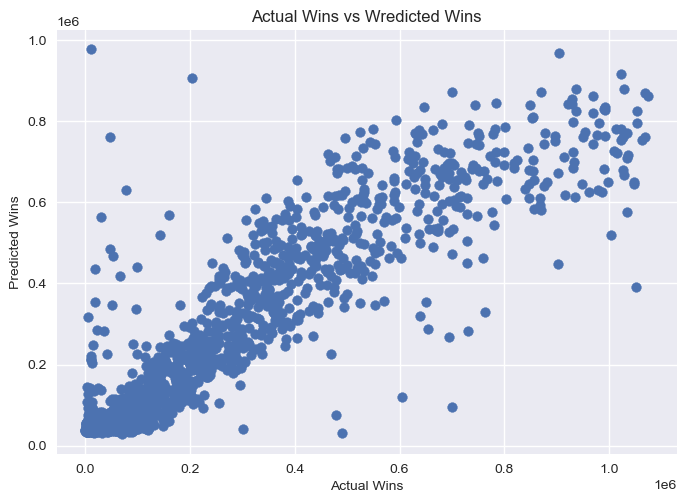

In [38]:
plt.scatter(y, y_predict)
plt.title('Actual Winnings vs Predicted Wins')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

# Linear Regression with multiple feature

Let's compare the score for a model built using all offensive and defensive features and one with only the features with the lowest score. I will use `Wins` and `Winnings` as outcomes. 

In [45]:
# Linear Regression model built with all features to predict Wins
x = df[['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon',
                'BreakPointsSaved', 'ServiceGamesPlayed','ServiceGamesWon', 'TotalServicePointsWon', 
                'FirstServeReturnPointsWon','SecondServeReturnPointsWon','BreakPointsOpportunities', 
                'BreakPointsConverted','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','TotalPointsWon']]
y = df['Wins']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()
lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)
loss = mean_squared_error(y_test, y_predict)

print("The test score: " + str(loss))

The test score: 16.11713487282298


In [47]:
# Linear Regression model built with specific features features to predict Wins
x = df[['Aces', 'DoubleFaults', 'ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities']]
y = df['Wins']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()
model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)
loss = mean_squared_error(y_test, y_predict)

print("The test score: " + str(loss))

The test score: 15.935611147819413


The score is better when I only use the features that were at the top in the table in the previous section of the project.
Let's plot the relationship between actual wins and predicted wins to see how it looks like.

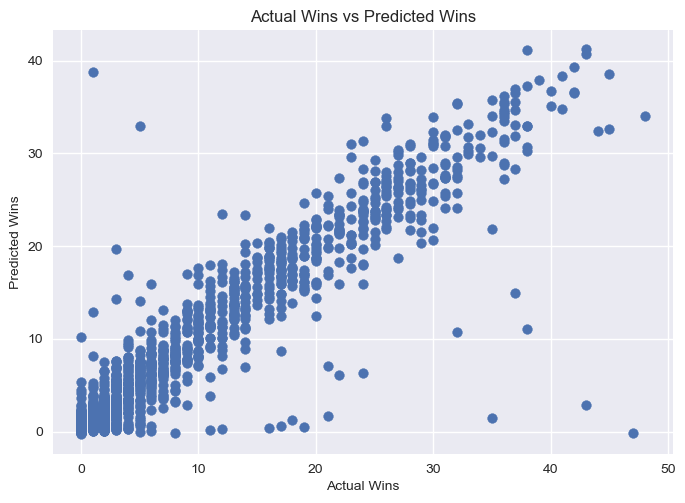

In [49]:
x = df[['Aces', 'DoubleFaults', 'ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities']]
y = df['Wins']

lm = LinearRegression()
lm.fit(x, y)
y_predict= lm.predict(x)

plt.scatter(y, y_predict)
plt.title('Actual Wins vs Predicted Wins')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()

The smaller set of features looks very good to predict `Wins`. 
Let's use the same procedure to predict `Winnings`.

In [50]:
# Linear Regression model built with all features to predict Winnings
x = df[['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon',
                'BreakPointsSaved', 'ServiceGamesPlayed','ServiceGamesWon', 'TotalServicePointsWon', 
                'FirstServeReturnPointsWon','SecondServeReturnPointsWon','BreakPointsOpportunities', 
                'BreakPointsConverted','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','TotalPointsWon']]
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()
lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)
loss = mean_squared_error(y_test, y_predict)

print("The test score: " + str(loss))

The test score: 12637738674.915716


In [51]:
# Linear Regression model built with specific features features to predict Winnings
x = df[['Aces', 'DoubleFaults', 'ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities']]
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()
model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)
loss = mean_squared_error(y_test, y_predict)

print("The test score: " + str(loss))

The test score: 12627978414.23716


Again, only usigna small set of chosen features performs better.

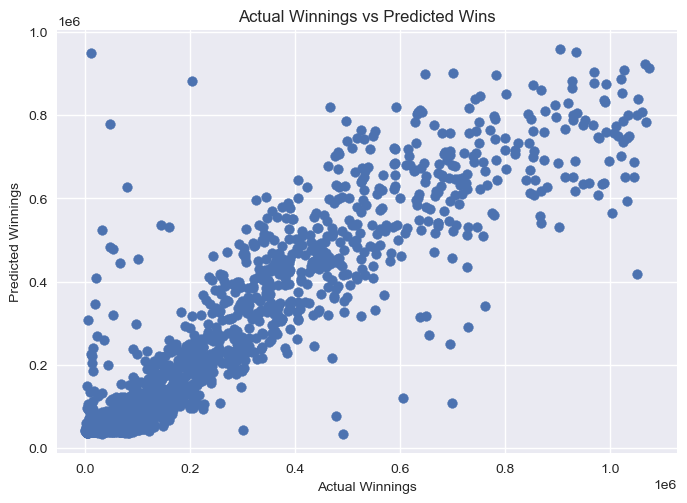

In [54]:
x = df[['Aces', 'DoubleFaults', 'ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities']]
y = df['Winnings']

lm = LinearRegression()
lm.fit(x, y)
y_predict= lm.predict(x)

plt.scatter(y, y_predict)
plt.title('Actual Winnings vs Predicted Wins')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

# Conclusions

From the single feature `LinearRegression` analysis, the best feature to predict `Wins` is `ServiceGamesPlayed`, while the best one to predict `Winnings` is `ReturnGamesPlayed`.

When using multiple features to predict either `Wins` or `Winnings`, the model performs better if I only use the features that had the lower scores in the tables above. For both outcomes, these features are:
- Aces
- DoubleFaults
- ServiceGamesPlayed
- ReturnGamesPlayed
- BreakPointsOpportunities

